# urban surface temperature reduction figure
- This script is used to visualize TG_U reduction;
- Simulations: CNTL, ROOF_DA, IMPRAOD_DA, WALL_DA;

In [2]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

In [3]:
home_path = '/work/n02/n02/yuansun/'
#case0
path_0 = home_path + 'cesm/archive/case0/lnd/hist/'
#case2
path_2 = home_path + 'cesm/archive/case2/lnd/hist/'
#case3
path_3 = home_path + 'cesm/archive/case3/lnd/hist/'
#case5
path_5 = home_path + 'cesm/archive/case5/lnd/hist/'

In [4]:
start_year = 2015
end_year = 2040

In [5]:
# case0 file
clm_2040_c0 = 'case0.clm2.h1.2040-02-01-00000.nc'
clm_2041_c0 = 'case0.clm2.h1.2041-02-01-00000.nc'
ds_2040_c0 = xr.open_dataset(path_0 + clm_2040_c0)
ds_2041_c0 = xr.open_dataset(path_0 + clm_2041_c0)

lat = ds_2040_c0['lat']
lon = ds_2040_c0['lon']

tsa_0 = ds_2040_c0['TSA_U'].mean('time') 
tsa_0_JJA = ds_2040_c0['TSA_U'][6:9,:,:].mean('time')
tsa_0_DJF = xr.concat([ds_2040_c0['TSA_U'].isel(time=11),ds_2041_c0['TSA_U'].isel(time=slice(0, 2))], dim='time').mean('time') 

tg_0 = ds_2040_c0['TG_U'].mean('time') 
tg_0_JJA = ds_2040_c0['TG_U'][6:9,:,:].mean('time')
tg_0_DJF = xr.concat([ds_2040_c0['TG_U'].isel(time=11),ds_2041_c0['TG_U'].isel(time=slice(0, 2))], dim='time').mean('time') 

In [6]:
# case2 file
clm_2040_c1 = 'case2.clm2.h1.2040-02-01-00000.nc'
clm_2041_c1 = 'case2.clm2.h1.2041-02-01-00000.nc'
ds_2040_c1 = xr.open_dataset(path_2 + clm_2040_c1)
ds_2041_c1 = xr.open_dataset(path_2 + clm_2041_c1)

tsa_1 = ds_2040_c1['TSA_U'].mean('time')  
tsa_1_JJA = ds_2040_c1['TSA_U'][6:9,:,:].mean('time') 
tsa_1_DJF = xr.concat([ds_2040_c1['TSA_U'].isel(time=11),ds_2041_c1['TSA_U'].isel(time=slice(0, 2))], dim='time').mean('time') 

tg_1 = ds_2040_c1['TG_U'].mean('time') 
tg_1_JJA = ds_2040_c1['TG_U'][6:9,:,:].mean('time')  
tg_1_DJF = xr.concat([ds_2040_c1['TG_U'].isel(time=11),ds_2041_c1['TG_U'].isel(time=slice(0, 2))], dim='time').mean('time') 

In [7]:
# case3 file
clm_2040_c3 = 'case3.clm2.h1.2040-02-01-00000.nc'
ds_2040_c3 = xr.open_dataset(path_3 + clm_2040_c3)
clm_2041_c3 = 'case3.clm2.h1.2041-02-01-00000.nc'
ds_2041_c3 = xr.open_dataset(path_3 + clm_2041_c3)

tsa_3 = ds_2040_c3['TSA_U'].mean('time')   
tsa_3_JJA = ds_2040_c3['TSA_U'][6:9,:,:].mean('time') 
tsa_3_DJF = xr.concat([ds_2040_c3['TSA_U'].isel(time=11),ds_2041_c3['TSA_U'].isel(time=slice(0, 2))], dim='time').mean('time') 

tg_3 = ds_2040_c3['TG_U'].mean('time') 
tg_3_JJA = ds_2040_c3['TG_U'][6:9,:,:].mean('time') 
tg_3_DJF = xr.concat([ds_2040_c3['TG_U'].isel(time=11),ds_2041_c3['TG_U'].isel(time=slice(0, 2))], dim='time').mean('time') 

In [8]:
# case5 file
clm_2040_c5 = 'case5.clm2.h1.2040-02-01-00000.nc'
ds_2040_c5 = xr.open_dataset(path_5 + clm_2040_c5)
clm_2041_c5 = 'case5.clm2.h1.2041-02-01-00000.nc'
ds_2041_c5 = xr.open_dataset(path_5 + clm_2041_c5)

tsa_5 = ds_2040_c5['TSA_U'].mean('time') 
tsa_5_JJA = ds_2040_c5['TSA_U'][6:9,:,:].mean('time') 
tsa_5_DJF = xr.concat([ds_2040_c5['TSA_U'].isel(time=11),ds_2041_c5['TSA_U'].isel(time=slice(0, 2))], dim='time').mean('time') 

tg_5 = ds_2040_c5['TG_U'].mean('time') 
tg_5_JJA = ds_2040_c5['TG_U'][6:9,:,:].mean('time') 
tg_5_DJF = xr.concat([ds_2040_c5['TG_U'].isel(time=11),ds_2041_c5['TG_U'].isel(time=slice(0, 2))], dim='time').mean('time') 

In [9]:
tsa_M_10 = tsa_1 - tsa_0
tsa_M_JJA_10 = tsa_1_JJA - tsa_0_JJA
tsa_M_DJF_10 = tsa_1_DJF - tsa_0_DJF

tg_M_10 = tg_1 - tg_0
tg_M_JJA_10 = tg_1_JJA - tg_0_JJA
tg_M_DJF_10 = tg_1_DJF - tg_0_DJF

In [10]:
tsa_M_30 = tsa_3 - tsa_0
tsa_M_JJA_30 = tsa_3_JJA - tsa_0_JJA
tsa_M_DJF_30 = tsa_3_DJF - tsa_0_DJF

tg_M_30 = tg_3 - tg_0
tg_M_JJA_30 = tg_3_JJA - tg_0_JJA
tg_M_DJF_30 = tg_3_DJF - tg_0_DJF

In [11]:
tsa_M_50 = tsa_5 - tsa_0
tsa_M_JJA_50 = tsa_5_JJA - tsa_0_JJA
tsa_M_DJF_50 = tsa_5_DJF - tsa_0_DJF

tg_M_50 = tg_5 - tg_0
tg_M_JJA_50 = tg_5_JJA - tg_0_JJA
tg_M_DJF_50 = tg_5_DJF - tg_0_DJF

In [12]:
tu = [tg_M_10, tg_M_JJA_10, tg_M_DJF_10,
       tg_M_30, tg_M_JJA_30, tg_M_DJF_30,
       tg_M_50, tg_M_JJA_50, tg_M_DJF_50]

In [13]:
# drawing
linewidth = 0.5
linewidth2 = 1
fontsize = 6
labelfont = 6
labelcolor = '#6b6b6b'
lc1 = '#6e1913'
lc2 = '#a42018'
lc3 = '#f62d18'
lc4 = '#d97c26'
lc5 = '#ff912b'
lc6 = '#30b5d6'
lc7 = '#28ac92'
lc8 = '#123264'
lc9 = '#05101f'
specific_years = [2015, 2050, 2041]
alpha=0.075
boundarywidth = 0.5
extent = [-180,180,-90,90]
# proj = ccrs.PlateCarree()
cmap = plt.cm.viridis
#cmap = plt.cm.get_cmap('rainbow')
#cmap = plt.cm.get_cmap('gist_ncar')
#cmap = plt.cm.get_cmap('coolwarm')
#cmap = plt.cm.get_cmap('GnBu')
title = ['(a) ANN', '(b) JJA', '(c) DJF', 
         '(d) ANN', '(e) JJA', '(f) DJF', 
         '(g) ANN', '(h) JJA ','(i) DJF']
offset = 5

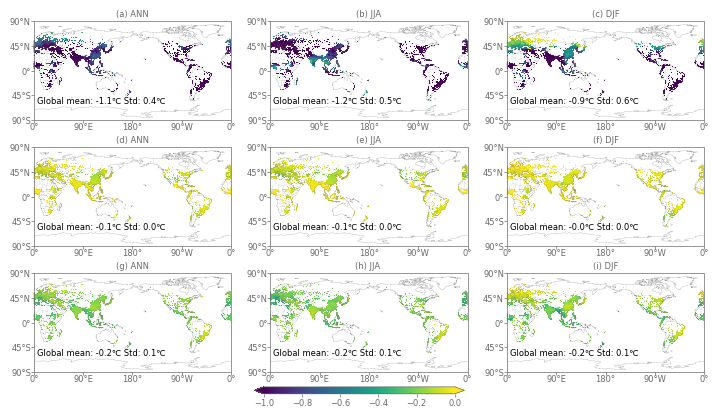

In [26]:
proj = ccrs.PlateCarree(central_longitude=180)
fig, axs = plt.subplots(3, 3, figsize=(7, 4), subplot_kw={'projection': proj}, gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

for i, ax in enumerate(axs.flatten()):
    ax.set_extent(extent, crs=proj)
    ax.add_feature(cfeature.BORDERS,lw=0.1, linestyle='dashed', edgecolor=labelcolor,alpha=1)
    ax.coastlines(resolution='110m',linestyle='dashed',linewidth=0.2,zorder=2,color=labelcolor,alpha=1, edgecolor=labelcolor)
    ax.set_xticks(np.arange(extent[0], extent[1] +1, 90), crs = proj)
    ax.tick_params(axis='both', labelsize=3.5, length=2, pad =0.03, width=boundarywidth)
    ax.set_yticks(np.arange(extent[-2], extent[-1] + 1, 45), crs = proj)
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.tick_params(axis='y', colors=labelcolor, labelsize=labelfont)
    ax.tick_params(axis='x', colors=labelcolor, labelsize=labelfont)
    ax.text(-180 + offset, -90 + offset*6,'Global mean: ' + str("{:.1f}".format(tu[i].mean())) + '℃ Std: ' + str("{:.1f}".format(tu[i].std())) + '℃', fontsize=labelfont)
    for spine in ax.spines.values():
        spine.set_linewidth(boundarywidth)
        spine.set_edgecolor(labelcolor)   
       
    cs = ax.pcolormesh(lon-180, lat, tu[i] ,cmap=cmap, vmin=-1, vmax=0)
    ax.set_title(title[i],fontsize = labelfont ,pad=3.5,color = labelcolor)
    
plt.subplots_adjust(left=0.035, right=0.9925, bottom=0.05, top=0.98, wspace=0.1, hspace= 0.15)  

cbar = plt.colorbar(cs,ax=axs, shrink=0.33,orientation='horizontal',location='bottom', pad=0.01, extend='both', fraction=0.03, aspect=30)
cbar.ax.tick_params(length=2,labelsize=labelfont, pad =1, width=boundarywidth, colors=labelcolor)
cbar.outline.set_linewidth(boundarywidth)
cbar.outline.set_edgecolor(labelcolor)
cbar.ax.yaxis.label.set_color(labelcolor)
cbar.ax.set_position([0.35, -0.45, 0.3, 0.5])
fig.savefig('hete_space.png',dpi=300) 
fig.savefig('hete_space.pdf',dpi=600) 

# Description

In [17]:
print(tg_M_50.max(), tg_M_50.min())

<xarray.DataArray 'TG_U' ()>
array(-0.1394043, dtype=float32) <xarray.DataArray 'TG_U' ()>
array(-1.0079346, dtype=float32)


In [19]:
print(tg_M_10.max(), tg_M_10.min())

<xarray.DataArray 'TG_U' ()>
array(-0.55184937, dtype=float32) <xarray.DataArray 'TG_U' ()>
array(-7.3511963, dtype=float32)


In [20]:
print(tg_M_30.max(), tg_M_30.min())

<xarray.DataArray 'TG_U' ()>
array(0.00134277, dtype=float32) <xarray.DataArray 'TG_U' ()>
array(-0.573822, dtype=float32)


In [120]:
max_index = tg_M_10.argmin()
max_index_2d = np.unravel_index(max_index, tsa_M_10.shape)

# Get latitude and longitude coordinates of the maximum value
lat_max = tg_M_10.lat.values[max_index_2d[0]]
lon_max = tg_M_10.lon.values[max_index_2d[1]]

print("Latitude of max:", lat_max)
print("Longitude of max:", lon_max)
print("minimum:", tg_M_10.min() )

Latitude of max: -18.376963
Longitude of max: 290.0
minimum: <xarray.DataArray 'TG_U' ()>
array(-2.7743225, dtype=float32)


In [38]:
tsa_M_10

<xarray.DataArray 'TSA_U' (lat: 192, lon: 288)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0

In [42]:
max_index = tsa_M_30.argmin()
max_index_2d = np.unravel_index(max_index, tg_M_30.shape)

# Get latitude and longitude coordinates of the maximum value
lat_max = tg_M_30.lat.values[max_index_2d[0]]
lon_max = tg_M_30.lon.values[max_index_2d[1]]

print("Latitude of max:", lat_max)
print("Longitude of max:", lon_max)
print("minimum:", tsa_M_30.min() )

Latitude of max: 40.052357
Longitude of max: 78.75
minimum: <xarray.DataArray 'TSA_U' ()>
array(-0.18457031, dtype=float32)


In [119]:
max_index = tg_M_JJA_50.argmin()
max_index_2d = np.unravel_index(max_index, tg_M_JJA_50.shape)

# Get latitude and longitude coordinates of the maximum value
lat_max = tg_M_JJA_50.lat.values[max_index_2d[0]]
lon_max = tg_M_JJA_50.lon.values[max_index_2d[1]]

print("Latitude of max:", lat_max)
print("Longitude of max:", lon_max)
print("minimum:", tg_M_JJA_50.min() )

Latitude of max: 45.706806
Longitude of max: 8.75
minimum: <xarray.DataArray 'TG_U' ()>
array(-0.3774109, dtype=float32)


In [18]:
print(tg_M_JJA_10.mean(), tg_M_JJA_10.std())

<xarray.DataArray 'TG_U' ()>
array(-1.1975496, dtype=float32) <xarray.DataArray 'TG_U' ()>
array(0.54542595, dtype=float32)


In [19]:
print(tg_M_DJF_10.mean(), tg_M_DJF_10.std())

<xarray.DataArray 'TG_U' ()>
array(-0.8612462, dtype=float32) <xarray.DataArray 'TG_U' ()>
array(0.5971217, dtype=float32)


In [24]:
print(tsa_M_10.mean(axis=1))

<xarray.DataArray 'TSA_U' (lat: 192)>
array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan, -0.09228516, -0.134552  , -0.12242126,
               nan, -0.15301514,         nan, -0.18389893,         nan,
               nan, -0.10809326, -0.17031097, -0.16513062, -0.16156006,
       -0.1889445 , -0.17412312, -0.18627167, -0.19210204, -0.23325805,
       -0.19650546, -0.22675781, -0.25948715, -0.24832153, -0.24577162,
       -0.2524821 , -0.2621806 , -0.2678833 , -0.25229695, -0.24771118,
       -0.23994903, -0.248